## Laboratorio 1 

### Ordini di grandezza

1. Mostrare che $4n^2 + 4n - 1$ è $O(n^2)$ e anche $\Omega(n^2)$.


2. Ordinare le seguenti funzioni per ordine di grandezza crescente:

$$log_2\ n, 3^{n-2}, \pi^n, n^3 - 3n^2, n^{log\ n}, log_n\ n, n^{1/2}, 18$$

3. Le costanti moltiplicative sono sempre trascurabili? Come e quando diventano rilevanti? Provare a rispondere con un esempio.

4. Dimostrare che tutti i polinomi crescono meno delle funzioni esponenziali, ovvero che $n^k$ è $O(a^n)$ per ogni $k > 0$ e $a > 1$.


5. Fornire il costo computazionale del seguente pseudocodice, utilizzando le proprietà degli ordini di grandezza:

```
def loop(n):
    for i in range(n):
        do something which requires O(f(n))
    for i in range(n):
        for j in range(m):
            do something which requires O(g(n))
```




### Costo uniforme e costo logaritmico

1. Scrivere il codice Python per la funzione *test* presente alla fine della lezione 1.
2. Calcolare la complessità della funzione sia in termini di costo uniforme che di costo logaritmico (*hint*: esiste una funzione Python che vi ritorna lo spazio occupato da un oggetto)
3. Calcolare il costo uniforme e il costo logaritmico della funzione al variare della dimensione dell'input.
4. Plottare i risultati in funzione della dimensione dell'input (utilizzare un range di valori opportuno) e confrontarli con i risultati teorici.

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
def test(n):
    z = 2
    uniform_cost = 1
    logaritmic_cost = z.bit_length()
    for i in range(n):
        z = z**2
        uniform_cost += 1
        logaritmic_cost += z.bit_length() + 1
    
    return z, uniform_cost, logaritmic_cost

Costo uniforme e logaritmico della funzione *test*.

100%|██████████| 10/10 [00:00<?, ?it/s]


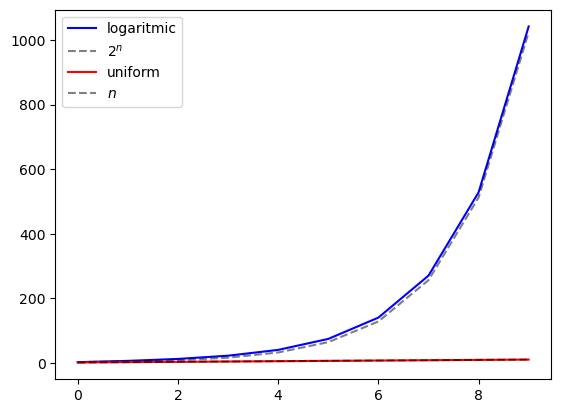

In [10]:
lcost = []
ucost = []

max_pow = 10
for i in tqdm(range(max_pow)):
    z, uniform_cost, logaritmic_cost = test(i)
    lcost.append(logaritmic_cost)
    ucost.append(uniform_cost)

plt.plot(lcost, c="blue")
plt.plot( 2**np.arange(1, max_pow+1), c="black", linestyle="--", alpha=0.5)
plt.plot(ucost, c="red")
plt.plot(np.arange(1, max_pow+1), c="black", linestyle="--", alpha=0.5)


plt.legend(["logaritmic", r'$2^n$', "uniform", r'$n$'])

### Scalabilità

1. Implementare la funzione che calcola il massimo comune divisore tra due numeri interi positivi, sia utilizzando l'algoritmo naive che l'algoritmo di Euclide.
2. Stimare il costo uniforme dei due algoritmi e plottare il risultato in funzione della dimensione dell'input.
3. Confrontare i risultati ottenuti con i tempi di esecuzione di ciascuna funzione.

In [11]:

def naive_algorithm(n, m):
    """
    Trying all possible divisors from largest to smallest
    """

    mcd = 0 
    steps = 0
    since = time.time()

    for i in range(1, int(np.floor(np.sqrt(min(n, m))) +1)):
        steps += 1
        if n % i == 0:
            if m % (n//i)  == 0:
                return n//i, time.time() - since, steps
            else:
                if m % i == 0:
                    mcd = i
    
    time_taken = time.time() - since

    return mcd, time_taken, steps

def euclidean_algorithm(n, m):
    since = time.time()
    steps = 0
    if n > m:
        n, m = m, n
    while n != 0:
        steps += 1
        m, n = n, m % n

    time_taken = time.time() - since

    return m, time_taken, steps


In [12]:
time_naive = []
steps_naive = []
time_euclidean = []
steps_euclidean = []

for i in tqdm(range(13)):
    n = 10**i
    m = 10**(i)+5
    _, time_taken, steps = naive_algorithm(n, m)
    time_naive.append(time_taken)
    steps_naive.append(steps)

    _, time_taken, steps = euclidean_algorithm(n, m)
    time_euclidean.append(time_taken)
    steps_euclidean.append(steps)

100%|██████████| 13/13 [00:00<00:00, 46.66it/s]


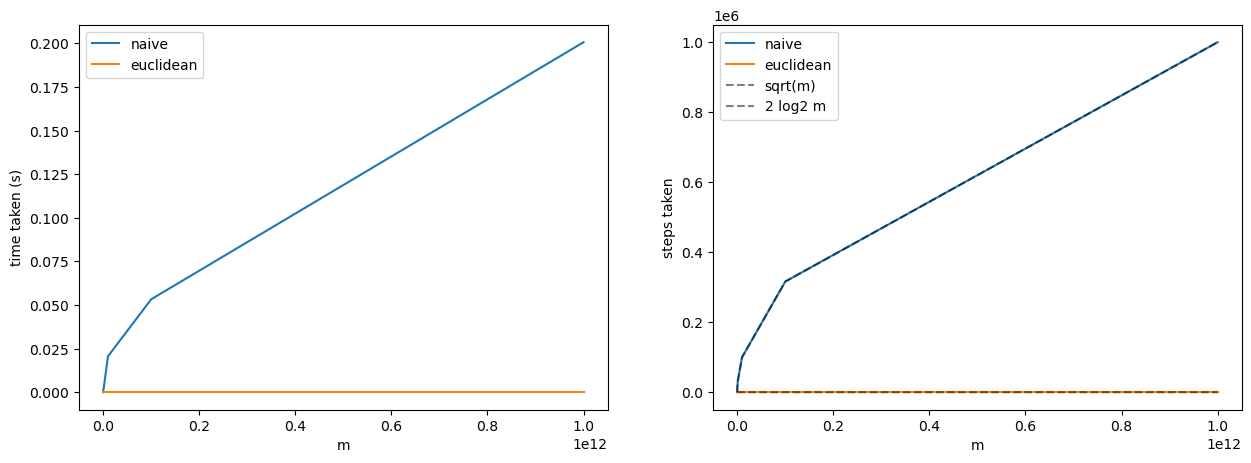

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x = [10**i for i in range(13)]
plt.plot(x, time_naive, label="naive")
plt.plot(x, time_euclidean, label="euclidean")
plt.xlabel("m")
plt.ylabel("time taken (s)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, steps_naive, label="naive")
plt.plot(x, steps_euclidean, label="euclidean")
plt.plot(x, np.sqrt(x), label="sqrt(m)", color="black", linestyle="--", alpha=0.5)
plt.plot(x, 2*np.log2(x), label="2 log2 m", color="black", linestyle="--", alpha=0.5)
plt.xlabel("m")
plt.ylabel("steps taken")

plt.legend()
plt.show()